In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
import shutil
import os
import math
import glob
import matplotlib.pyplot as plt # to plot graphs for viusal differencing between parameters
import numpy as np


In [9]:
Root="E:\chrome extention\Brain-Tumer-Detection\dataset"
no_of_img= {}

for dir in os.listdir(Root):
    no_of_img[dir]=len(os.listdir(os.path.join(Root,dir)))


In [10]:
no_of_img.items()

dict_items([('No_Tumor', 2000), ('Tumor', 5023)])

In [11]:
def dataFolder(name,split):
  if not os.path.exists('./'+name):
    os.mkdir('./'+name)
    for dir in os.listdir(Root):
      os.mkdir(os.path.join('.',name,dir))

      #for more randomness in selecting the data we use the random method of numpy
      for j in np.random.choice(a= os.listdir(Root+"/"+dir),size = math.floor((split)*no_of_img[dir])-5,replace = False):

        O=os.path.join(Root,dir,j)
        D=os.path.join('./',name,dir)

        shutil.copy(O,D) # copies files from one directory/folder to another OR copying images from one path to other
        # os.remove(O) # removes a file

  else :
    print("The folder already exists")


In [12]:
dataFolder('train',0.7)
dataFolder('valid',0.15)
dataFolder('test',0.15)

In [1]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [3]:

# CNN MODEL

model= Sequential()

# convloutional layer
# building the convolutional layers
model.add(Conv2D(filters = 16, kernel_size = (3,3),activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 36, kernel_size = (3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25)) # to filter or drop 25% data
model.add(Flatten())
model.add(Dense(units = 64 ,activation = 'relu'))
model.add(Dropout(rate = 0.25))

# if the answer is the opposite check this 1
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.summary()

e:\chrome extention\Brain-Tumer-Detection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])


In [5]:
def preprocessingImages1(path):
  """
    input : Path
    output : Pre Processed Images
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True) # DATA AUGMENTATION

  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32 , class_mode = 'binary')

  return image

In [7]:
path1 = './train'
train_data = preprocessingImages1( path1 )

Found 4906 images belonging to 2 classes.


In [8]:
def preprocessingImages2(path):
  """
    input : Path
    output : Pre Processed Images
  """
  image_data = ImageDataGenerator( rescale = 1/255)
  image = image_data.flow_from_directory(directory = path,target_size = (224,224),batch_size = 32 , class_mode = 'binary')

  return image

In [9]:
path2 = './test'
test_data = preprocessingImages2(path2)


Found 1043 images belonging to 2 classes.


In [19]:
path3 = './valid'
valid_data = preprocessingImages2(path3)

Found 1043 images belonging to 2 classes.


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [21]:

# early stopping

es = EarlyStopping( monitor = 'val_accuracy' , min_delta = 0.01 , patience = 5,verbose = 1, mode='auto')


In [22]:

# model checkpoint

mc = ModelCheckpoint( monitor = 'val_accuracy' , filepath = './bestmodel.keras',verbose = 1,save_best_only = True, mode='auto')


In [23]:

cd=[es,mc] # as callbacks takes an array so we made an array to pass with early stopping and  model checkpoint


In [27]:
hs = model.fit(
    x=train_data,
    steps_per_epoch=20,
    epochs=30,
    verbose=1,
    validation_data=valid_data,
    validation_steps=10,
    callbacks=cd
)


Epoch 1/30


e:\chrome extention\Brain-Tumer-Detection\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6872 - loss: 0.8580
Epoch 1: val_accuracy improved from -inf to 0.71562, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 189s 7s/step - accuracy: 0.6866 - loss: 0.8511 - val_accuracy: 0.7156 - val_loss: 0.5275
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7414 - loss: 0.5016
Epoch 2: val_accuracy improved from 0.71562 to 0.74375, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.7444 - loss: 0.4976 - val_accuracy: 0.7437 - val_loss: 0.4949
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8737 - loss: 0.3340
Epoch 3: val_accuracy improved from 0.74375 to 0.91562, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.8738 - loss: 0.3339 - val_accuracy: 0.9156 - val_loss: 0.2707
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9097 - loss: 0.2397
Epoch 4: val_accuracy did not improve from 0.91562
20/20 ━━━━━━━━

C:\Users\DELHI LAPTOP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9204 - loss: 0.2252
Epoch 5: val_accuracy improved from 0.91562 to 0.93750, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.9207 - loss: 0.2241 - val_accuracy: 0.9375 - val_loss: 0.2081
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9527 - loss: 0.1763
Epoch 6: val_accuracy did not improve from 0.93750
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.9515 - loss: 0.1792 - val_accuracy: 0.7781 - val_loss: 0.4327
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9205 - loss: 0.2694
Epoch 7: val_accuracy did not improve from 0.93750
20/20 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9200 - loss: 0.2689 - val_accuracy: 0.8938 - val_loss: 0.2854
Epoch 8/30
14/20 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9214 - loss: 0.2498
Epoch 8: val_accuracy did not improve from 0.93750
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9242 - loss: 0.2289 - val_accuracy: 

In [28]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

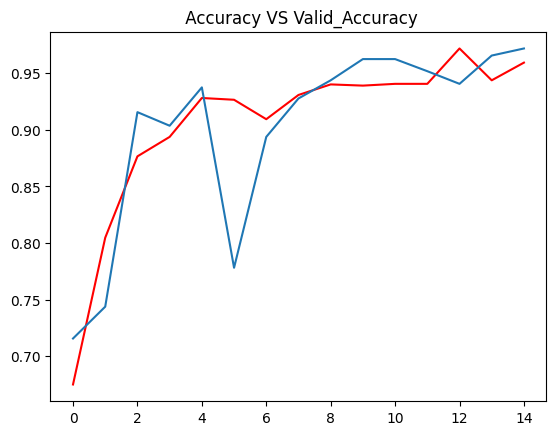

In [31]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'],c='red')

plt.plot(h['val_accuracy'])

plt.title(' Accuracy VS Valid_Accuracy')

plt.show()

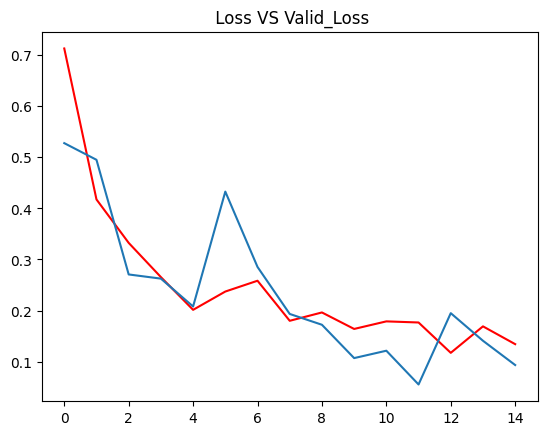

In [32]:
plt.plot(h['loss'],c='red')

plt.plot(h['val_loss'])

plt.title(' Loss VS Valid_Loss')

plt.show()

In [33]:

from keras.models import load_model

In [35]:
model = load_model("./bestmodel.keras")
acc = model.evaluate(test_data)[1]

print(f"Our model accuracy is {acc*100} %")

e:\chrome extention\Brain-Tumer-Detection\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 729ms/step - accuracy: 0.9649 - loss: 0.1033
Our model accuracy is 96.83604836463928 %


In [36]:
from keras.preprocessing.image import load_img,img_to_array

In [65]:
import numpy as np

path = r'..\dataset\No_Tumor\Te-no_0019.jpg'

img = load_img(path,target_size = (224,224))
input_arr = img_to_array(img)/255 # /255 to normalise the image

input_arr = np.expand_dims(input_arr,axis = 0)
pred = model.predict(input_arr)[0][0]

pred

if(pred == 0):
  print(" The MRI image has a tumor")
else :
  print(" The MRI image is a Healthy image")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
 The MRI image is a Healthy image
